In [24]:
import sys
import os
import pandas as pd
import numpy as np

sys.path.append(f'{os.path.dirname(os.path.dirname(os.getcwd()))}')

In [25]:
os.getcwd()
# os.chdir('scripts')

'/Users/hinayatali/Desktop/School/MIE479/EMSF_CAPSTONE/draft_pick_prob/modelling/scripts'

In [38]:
import extract_probabilities

import importlib
importlib.reload(extract_probabilities)

lw = 1
rw = 1
c = 1
ld = 1
rd = 1
g = 1

pos_constraint = {'LW': lw, 'RW': rw, 'C': c, 'LD': ld, 'RD': rd, 'G': g}

player_rankings=pd.read_csv('/Users/hinayatali/Desktop/School/MIE479/EMSF_CAPSTONE/PLAYER_IDS.csv')
player_position=pd.read_csv('/Users/hinayatali/Desktop/School/MIE479/EMSF_CAPSTONE/PLAYER_POSITIONS.csv')
team_needs=pd.read_csv('/Users/hinayatali/Desktop/School/MIE479/EMSF_CAPSTONE/Prospect Pool/percentiles.csv', index_col=0)

extract_probabilities.determine_optimal_pick(player_rankings, player_position, team_needs, "CHI", [1, 19, 35, 44, 51, 55, 67, 93, 99, 131, 195], [], pos_constraint, 0.8)

/Users/hinayatali/Desktop/School/MIE479/EMSF_CAPSTONE/draft_pick_prob/modelling/scripts/extract_probabilities.py:306: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dict[i]["zscore"] = (
/Users/hinayatali/Desktop/School/MIE479/EMSF_CAPSTONE/draft_pick_prob/modelling/scripts/extract_probabilities.py:306: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dict[i]["zscore"] = (
/Users/hinayatali/Desktop/School/MIE479/EMSF_CAPSTONE/draft_pick_prob/modelling/scripts/extract_probabilities.py:311: SettingWithCopyW

1

In [186]:
draft_df=pd.read_csv('/Users/hinayatali/Desktop/EMSF_CAPSTONE/draft_pick_prob/draft_order/2023/2023_NHL_DRAFT.csv')
mock_draft_df=pd.read_csv('/Users/hinayatali/Desktop/EMSF_CAPSTONE/draft_pick_prob/mock_drafts/2023/JUNE_21_2023_PRONMAN_MOCK.csv')
mock_draft_df_2=pd.read_csv('/Users/hinayatali/Desktop/EMSF_CAPSTONE/draft_pick_prob/mock_drafts/2023/JUNE_28_2023_PRONMAN_MOCK.csv').rename(columns={'RANK':'RANK_PRONMAN_JUNE_28'})
mock_draft_df_3=pd.read_csv('/Users/hinayatali/Desktop/EMSF_CAPSTONE/draft_pick_prob/mock_drafts/2023/JUNE_22_2023_MCKENZIE_MOCK.csv').rename(columns={'RANK':'RANK_MCKENZIE_JUNE_22'})
mock_draft_df_4=pd.read_csv('/Users/hinayatali/Desktop/EMSF_CAPSTONE/draft_pick_prob/mock_drafts/2023/EP_FINAL_RANKING.csv').rename(columns={'RANK':'RANK_EP_FINAL'})
mock_draft_df_5=pd.read_csv('/Users/hinayatali/Desktop/EMSF_CAPSTONE/draft_pick_prob/mock_drafts/2023/FC_FINAL_RANKINGS.csv').rename(columns={'RANK':'RANK_FC_FINAL'})
mock_draft_df_6=pd.read_csv('/Users/hinayatali/Desktop/EMSF_CAPSTONE/draft_pick_prob/mock_drafts/2023/MH_FINAL_RANKINGS.csv').rename(columns={'RANK':'RANK_MH_FINAL'})
mock_draft_df_7=pd.read_csv('/Users/hinayatali/Desktop/EMSF_CAPSTONE/draft_pick_prob/mock_drafts/2023/MP_FINAL_RANKINGS.csv').rename(columns={'RANK':'RANK_MP_FINAL'})
mock_draft_df_8=pd.read_csv('/Users/hinayatali/Desktop/EMSF_CAPSTONE/draft_pick_prob/mock_drafts/2023/RS_FINAL_RANKINGS.csv').rename(columns={'RANK':'RANK_RS_FINAL'})
mock_draft_df_9=pd.read_csv('/Users/hinayatali/Desktop/EMSF_CAPSTONE/draft_pick_prob/mock_drafts/2023/SS_FINAL_RANKINGS.csv').rename(columns={'RANK':'RANK_SS_FINAL'})
mock_draft_df_10=pd.read_csv('/Users/hinayatali/Desktop/EMSF_CAPSTONE/draft_pick_prob/mock_drafts/2023/DH_FINAL_RANKINGS.csv').rename(columns={'RANK':'RANK_DH_FINAL'})
# mock_draft_df_11=pd.read_csv('/Users/hinayatali/Desktop/EMSF_CAPSTONE/draft_pick_prob/mock_drafts/2023/PRONMAN_UPSIDE__RANKINGS.csv').rename(columns={'RANK':'RANK_PRONMAN_UPSIDE'})
possible_players=pd.read_csv('/Users/hinayatali/Desktop/EMSF_CAPSTONE/PLAYER_IDS.csv')
mock_draft_df_10

,PLAYER_NAME,PLAYER_ID,RANK_DH_FINAL
0,Connor Bedard,1,1
1,Adam Fantilli,2,2
2,Matvei Michkov,8,3
3,Leo Carlsson,3,4
4,Will Smith,4,5
...,...,...,...
59,Charlie Stramel,29,60
60,Noah Dower-Nilsson,84,61
61,Luca Pinelli,103,62
62,David Edstrom,21,63


In [187]:
import math
df_player_rankings=possible_players[['PLAYER_ID']].merge(mock_draft_df[['PLAYER_ID','RANK']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_df_2[['PLAYER_ID','RANK_PRONMAN_JUNE_28']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_df_3[['PLAYER_ID','RANK_MCKENZIE_JUNE_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_df_4[['PLAYER_ID','RANK_EP_FINAL']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_df_5[['PLAYER_ID','RANK_FC_FINAL']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_df_6[['PLAYER_ID','RANK_MH_FINAL']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_df_7[['PLAYER_ID','RANK_MP_FINAL']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_df_8[['PLAYER_ID','RANK_RS_FINAL']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_df_9[['PLAYER_ID','RANK_SS_FINAL']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_df_10[['PLAYER_ID','RANK_DH_FINAL']], how='left', on=['PLAYER_ID'])
# df_player_rankings=df_player_rankings.merge(mock_draft_df_11[['PLAYER_ID','RANK_PRONMAN_UPSIDE']], how='left', on=['PLAYER_ID'])
df_player_rankings

,PLAYER_ID,RANK,RANK_PRONMAN_JUNE_28,RANK_MCKENZIE_JUNE_22,RANK_EP_FINAL,RANK_FC_FINAL,RANK_MH_FINAL,RANK_MP_FINAL,RANK_RS_FINAL,RANK_SS_FINAL,RANK_DH_FINAL
0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,3,3.0,2.0,3.0,3.0,4.0,3.0,4.0,6.0,4.0,4.0
3,4,4.0,4.0,4.0,7.0,5.0,4.0,6.0,4.0,6.0,5.0
4,5,5.0,5.0,8.0,9.0,10.0,16.0,19.0,11.0,20.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...
273,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
def likelihood(strengths, rankings):
    # params: vector of parameters [intercept, slope]
    likelihood=1
    counter=1
    paired_lists = list(zip(strengths, rankings))
    sorted_pairs = sorted(paired_lists, key=lambda x: x[1])
    sorted_list1, sorted_list2 = zip(*sorted_pairs)
    while counter<len(sorted_list2)+1 and sorted_list2[counter]!=sorted_list2[counter+1]:
        # print(np.exp(sorted_list1[counter-1]))
        # print(np.sum(np.exp(sorted_list1[counter-1:])))
        # print(np.exp(sorted_list1[counter-1])/np.sum(np.exp(sorted_list1[counter-1:])))
        likelihood+=np.log(np.exp(sorted_list1[counter-1])/np.sum(np.exp(sorted_list1[counter-1:])))
        counter+=1
    return likelihood

def neg_log_likelihood(params, df):
    neg_ll=1
    columns_to_go_through=df.columns[1:]
    for i in columns_to_go_through:
        max=df[i].max()+1
        player_rank=list(df[i])
        fixed_player_rank=[max if math.isnan(x) else x for x in player_rank]
        neg_ll-=likelihood(params, fixed_player_rank)
    return neg_ll

In [38]:
def constraint_eq(x):
    return sum(x)

In [190]:
import scipy.optimize

counter=40
l_play=[]
variable_bounds=[]
count=0

while count<len(df_player_rankings):
    l_play.append(counter)
    count+=1
    counter-=0.20
    variable_bounds.append((-40,40))

result = scipy.optimize.minimize(neg_log_likelihood, l_play, args=(df_player_rankings,), method='SLSQP', bounds=variable_bounds, constraints={'type': 'eq', 'fun': constraint_eq})
print(result.x)

[ 4.00000000e+01  3.62849152e+01  3.36533911e+01  3.25186382e+01
  2.94437990e+01  3.01297713e+01  3.02446271e+01  3.26228977e+01
  2.86712570e+01  2.73729874e+01  2.87490080e+01  2.87349539e+01
  2.91406079e+01  3.06982894e+01  2.74931197e+01  2.89618130e+01
  2.73413522e+01  2.97058570e+01  2.82401320e+01  2.92312736e+01
  2.54884214e+01  2.58104002e+01  2.79070031e+01  2.69599829e+01
  2.51779154e+01  2.50863292e+01  2.62251746e+01  2.80659533e+01
  2.51617882e+01  2.74153508e+01  2.64535509e+01  2.47082547e+01
  2.49779780e+01  2.69327786e+01  2.68987249e+01  2.59808726e+01
  2.45806972e+01  2.50322757e+01  2.50654211e+01  2.40057150e+01
  2.50571468e+01  2.52647349e+01  2.34322910e+01  2.50557720e+01
  2.67811810e+01  2.59704994e+01  2.39813743e+01  2.31090445e+01
  2.65512516e+01  2.33835725e+01  2.41471112e+01  2.43768845e+01
  2.32378504e+01  2.34532997e+01  2.30252760e+01  2.32740062e+01
  2.33224261e+01  2.43576338e+01  2.48434667e+01  2.26839584e+01
  2.32944700e+01  2.40613

In [296]:
player_ability_parameters_df=pd.read_csv('/Users/hinayatali/Desktop/EMSF_CAPSTONE/PLAYER_IDS.csv')
player_ability_parameters_df['ABILITY_PARAMS']=result.x
player_ability_parameters_df=player_ability_parameters_df.sort_values(by='ABILITY_PARAMS', ascending=False, axis=0)
player_ability_parameters_df.head(50)

,PLAYER_NAME,PLAYER_ID,ABILITY_PARAMS
0,Connor Bedard,1,40.000000
1,Adam Fantilli,2,36.284915
2,Leo Carlsson,3,33.653391
7,Matvei Michkov,8,32.622898
3,William Smith,4,32.518638
13,Zach Benson,14,30.698289
6,Ryan Leonard,7,30.244627
5,Dalibor Dvorsky,6,30.129771
17,Oliver Moore,18,29.705857
4,David Reinbacher,5,29.443799


In [341]:
player_ability_parameters_df.to_csv('/Users/hinayatali/Desktop/EMSF_CAPSTONE/draft_pick_prob/player_ability_params/player_parameters.csv', index=False)

In [199]:
print(np.exp(result.x[18])/np.sum(np.exp(result.x[7:])))

0.008677935034533088


In [320]:
x = 224  # Number of players to select
num_simulations = 1000  # Number of simulations

def simulate_player_selection(parameters, x):
    selected_players = []
    remaining_parameters = parameters.copy()
    indices=[i for i in range(len(parameters))]
    for _ in range(x):
        # Calculate choice probabilities based on the exponents of parameters
        choice_probabilities = [np.exp(param) for param in remaining_parameters]
        # Normalize choice probabilities
        total_probability = sum(choice_probabilities)
        normalized_probabilities = [prob / total_probability for prob in choice_probabilities]
        # Select a player based on the probabilities
        selected_player = np.random.choice(range(len(remaining_parameters)), p=normalized_probabilities)
        # Add the selected player to the list and remove the corresponding parameter
        selected_players.append(indices[selected_player]+1)
        indices.pop(selected_player)
        remaining_parameters = np.delete(remaining_parameters, selected_player)
        # print(len(remaining_parameters))

    return selected_players

simulation_results = []

for _ in range(num_simulations):
    selected_players = simulate_player_selection(player_ability_parameters_df['ABILITY_PARAMS'], x)
    simulation_results.append(selected_players)

In [321]:
lists_of_numbers=[]

for j in range(len(result.x)):
    first_player=[]
    for i in simulation_results:
        test_array = np.array(i)
        if (j+1) in i:
            res_array = np.where(test_array == j+1)[0][0]+1
            first_player.append(float(res_array))
        else:
            first_player.append(250)
    lists_of_numbers.append(first_player)



In [322]:
lists_of_numbers[0]

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

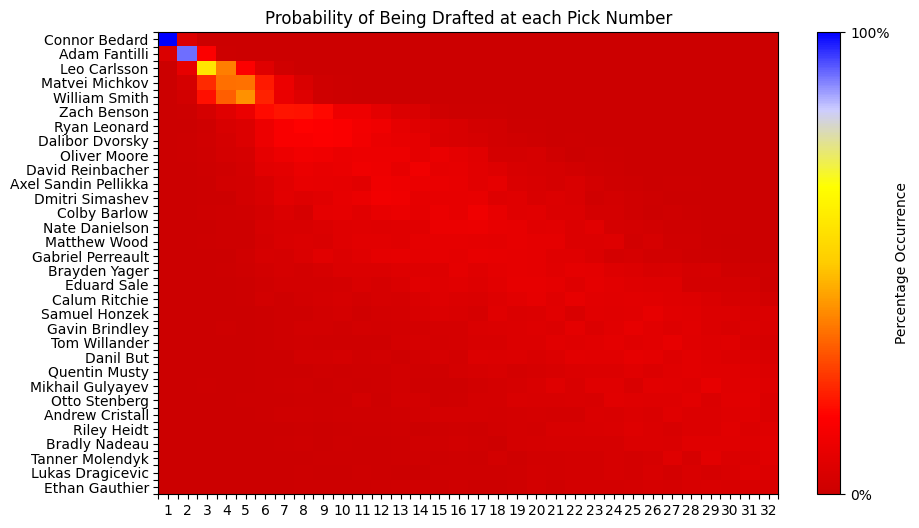

In [420]:
import numpy as np
import matplotlib.pyplot as plt

lists_of_numbers_2=lists_of_numbers[0:32]
unique_numbers_per_list = [np.unique(sublist, return_counts=True) for sublist in lists_of_numbers_2]
percentage_occurrences_per_list = []
for unique_numbers, counts in unique_numbers_per_list:
    total_count = sum(counts)
    percentages = [count / total_count for count in counts]
    percentage_occurrences_per_list.append(percentages)

# percentage_occurrences_per_list
# unique_numbers_per_list
from matplotlib.ticker import MultipleLocator
heatmap_array=np.zeros((32,32))

for i in range(len(unique_numbers_per_list)):
    for j in range(len(unique_numbers_per_list[i][0])):
        if (int(unique_numbers_per_list[i][0][j]))<=32:
            heatmap_array[i][int(unique_numbers_per_list[i][0][j])-1]=percentage_occurrences_per_list[i][int(j)]
            
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

custom_cmap = LinearSegmentedColormap.from_list('custom', colors, N=256)
log_transformed_data = np.log1p(heatmap_array)
heatmap_array
colors = [(0.8, 0, 0), (1, 0, 0), (1, 0.4, 0), (1, 0.8, 0), (1, 1, 0), (0.8, 0.8, 1), (0, 0, 1)]

# value_ranges = [(0.0, 0.20), (0.20, 0.40), (0.40, 0.60), (0.60, 0.80), (0.80, 1.0)]
# colors = ['blue', 'green', 'yellow', 'orange', 'red']
# norm = Normalize(vmin=0, vmax=1)
# sm = ScalarMappable(cmap='rainbow', norm=norm)
# sm.set_array([])
# cax = plt.imshow(heatmap_array, cmap='rainbow', interpolation='nearest', aspect='auto')
# cbar = plt.colorbar(sm, ticks=[norm(range_start) for range_start, _ in value_ranges])
# cbar.set_ticklabels(colors)
player_names=list(player_ability_parameters_df['PLAYER_NAME'].head(32))
plt.figure(figsize=(10, 6))
num_bins = 100  # Adjust the number of color levels

cax = plt.imshow(log_transformed_data, cmap=custom_cmap, interpolation='nearest', aspect='auto')
cbar = plt.colorbar(cax, ticks=[log_transformed_data.min(), log_transformed_data.max()])
cbar.set_ticklabels(['0%', '100%'])
cbar.set_label('Percentage Occurrence')
# plt.grid(which='both', color='black', linewidth=0.5)


plt.xticks(np.arange(32), range(1, 33))
plt.yticks(np.arange(len(player_names)), player_names)
plt.title('Probability of Being Drafted at each Pick Number')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.5))

plt.show()

In [525]:
def get_value(row, team, external_df):
    if row['POS'] in ['LW', 'RW', 'C']:
        return external_df.loc[team, 'df_F']
    elif row['POS'] == 'LD':
        return external_df.loc[team, 'df_LD']
    elif row['POS'] == 'RD':
        return external_df.loc[team, 'df_RD']
    else:
        return external_df.loc[team, 'df_G']

In [623]:
import sys
sys.path.append('/Users/hinayatali/Desktop/EMSF_CAPSTONE/draft_pick_prob/modelling/scripts/')

import extract_probabilities

import importlib
importlib.reload(extract_probabilities)

player_rankings=pd.read_csv('/Users/hinayatali/Desktop/EMSF_CAPSTONE/PLAYER_IDS.csv')
player_position=pd.read_csv('/Users/hinayatali/Desktop/EMSF_CAPSTONE/PLAYER_POSITIONS.csv')
team_needs=pd.read_csv('/Users/hinayatali/Desktop/EMSF_CAPSTONE/Prospect Pool/percentiles.csv', index_col=0)


l_player_val=[]
for i in range(len(player_rankings)):
    l_player_val.append(np.exp(-0.420*(i**0.391)))

player_rankings['PICK_VALUE']=l_player_val
# player_rankings=player_rankings.drop(['PLAYER_NAME'], axis=1)

# extract_probabilities.get_next_pick_probability([1, 2, 3, 4, 5, 6, 7, 8])
# store=extract_probabilities.get_pick_probability_by_pick([])
# pick_probs=extract_probabilities.probability_available_pick_x([])

# new_tab=pd.merge(pick_probs, player_rankings, how='left', on=['PLAYER_ID'])
# new_tab=pd.merge(new_tab, player_position[['PLAYER_ID','POS']], how='left', on=['PLAYER_ID'])
# new_tab['TEAM_NEED']=new_tab.apply(get_value, axis=1, team="Blackhawks", external_df=team_needs)
# pick_values=extract_probabilities.get_pick_values(new_tab, [1, 19, 35, 44, 51, 55, 67, 93, 131, 195], [])
# pick_values

In [537]:
data_list = [{'PLAYER_ID': key[0], 'GROUPED_POS': key[1], 'TEAM_NEED': key[2], 'VALUE': value} for key, value in pick_values.items()]

# Create a DataFrame from the list of dictionaries
df_new = pd.DataFrame(data_list, index=None)

,PLAYER_ID,GROUPED_POS,TEAM_NEED,VALUE
0,1,C,0.4375,2.072304
1,2,C,0.4375,1.639444
2,3,C,0.4375,1.506534
3,4,C,0.4375,1.544705
4,5,RD,0.3125,1.359048


In [551]:
import cvxpy as cp

Team = 'Blackhawks'

lw = 1
rw = 1
c = 1
ld = 1
rd = 1
g = 1

pos_constraint = {'LW': lw, 'RW': rw, 'C': c, 'LD': ld, 'RD': rd, 'G': g}

In [553]:
def objective(df, pos_const, user_weight):

  # Define variables
  x = cp.Variable(len(df.index), boolean=True)

  # Define objective
  obj_lp = cp.Maximize(x@df['VALUE']*user_weight+x@df['TEAM_NEED']*(1-user_weight))

  # Define constraints
  cons_lp = []  # Initialize constraint list

  for position, max_players in pos_const.items():
    cons_lp.append(cp.sum(x[df['GROUPED_POS'] == position]) <= max_players)
  cons_lp.append(sum(x)==1)

  prob_lp = cp.Problem(obj_lp,cons_lp)
  sol = prob_lp.solve()

  x_np_array_lp = x.value.astype(float)  # extract the x values as a np array
  x_values_lp = pd.Series(x_np_array_lp, index = df.index)  # convert the np array to a Datafram
  selected = np.where(x_values_lp == 1)[0]  # get assignments

  # Print selected player
  return sol, int(df.iloc[selected]['PLAYER_ID'])



In [584]:
extract_probabilities.determine_optimal_pick(player_rankings, player_position, team_needs, player_rankings, "Blackhawks", [1, 19, 35, 44, 51, 55, 67, 93, 131, 195], [], pos_constraint, 0.8)

/Users/hinayatali/Desktop/EMSF_CAPSTONE/draft_pick_prob/modelling/scripts/extract_probabilities.py:143: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  return sol, int(df.iloc[selected]['PLAYER_ID'])


'Connor Bedard'

In [626]:
extract_probabilities.simulate_draft(player_rankings, player_position, team_needs, player_rankings, "Blackhawks", [3, 19, 35, 44, 51, 55, 67, 93, 131, 195], [], pos_constraint, 0.8)

The probability the top three players on your list are available at pick 3 are as follows: 
  PLAYER_NAME       PICK_3
Connor Bedard 2.775558e-17
Adam Fantilli 1.133333e-01
 Leo Carlsson 9.466667e-01
Connor Bedard was selected
The probability the top three players on your list are available at pick 3 are as follows: 
  PLAYER_NAME   PICK_3
Adam Fantilli 0.123333
 Leo Carlsson 0.946667
William Smith 0.986667
Adam Fantilli was selected


/Users/hinayatali/Desktop/EMSF_CAPSTONE/draft_pick_prob/modelling/scripts/extract_probabilities.py:142: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  return sol, int(df.iloc[selected]['PLAYER_ID'])


(1.7138112795968912, 9)
You selected Gabriel Perreault
None
The probability the top three players on your list are available at pick 19 are as follows: 
     PLAYER_NAME       PICK_19
    Leo Carlsson  1.561251e-17
   William Smith -6.765422e-17
David Reinbacher  1.333333e-01
Leo Carlsson was selected
The probability the top three players on your list are available at pick 19 are as follows: 
     PLAYER_NAME      PICK_19
   William Smith 7.979728e-17
David Reinbacher 1.666667e-01
 Dalibor Dvorsky 3.000000e-02
Dalibor Dvorsky was selected
The probability the top three players on your list are available at pick 19 are as follows: 
     PLAYER_NAME      PICK_19
   William Smith 8.500145e-17
David Reinbacher 1.500000e-01
    Ryan Leonard 3.666667e-02
William Smith was selected
The probability the top three players on your list are available at pick 19 are as follows: 
     PLAYER_NAME      PICK_19
David Reinbacher 1.366667e-01
    Ryan Leonard 2.333333e-02
  Matvei Michkov 4.553649e-17
Ma

KeyboardInterrupt: 

In [156]:
import pymc as pm

x = 224  # Number of players to select
num_simulations = 1  # Number of simulations

# Create a PyMC3 model
with pm.Model() as model:
    # Define a parameter for the choice probabilities
    choice_probs = pm.Dirichlet('choice_probs', a=result.x, shape=len(result.x))

    # Simulate player selection
    selected_players = pm.Multinomial('selected_players', n=x, p=choice_probs, shape=len(result.x))

# Perform the simulations
with model:
    trace = pm.sample(num_simulations, chains=1, progressbar=True)

# Extract the results of player selection from the trace
simulation_results = trace['selected_players']

Only 1 samples in chain.


SamplingError: Initial evaluation of model at starting point failed!
Starting values:
{'choice_probs_simplex__': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan]), 'selected_players': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}

Initial evaluation results:
{'choice_probs': nan, 'selected_players': -inf}

In [123]:
raw_rank=pd.read_csv('/Users/hinayatali/Desktop/EMSF_CAPSTONE/draft_pick_prob/mock_drafts/raw_rankings/PRONMAN_UPSIDE_MOCK.csv')
player_id=pd.read_csv('/Users/hinayatali/Desktop/EMSF_CAPSTONE/PLAYER_IDS.csv')
updated=raw_rank.merge(player_id, on=['PLAYER_NAME'], how='left')
updated[['PLAYER_NAME', 'PLAYER_ID', 'RANK']].to_csv('/Users/hinayatali/Desktop/EMSF_CAPSTONE/draft_pick_prob/mock_drafts/2023/PRONMAN_UPSIDE__RANKINGS.csv', index=False)

In [96]:
tab_players=pd.read_csv('/Users/hinayatali/Desktop/EMSF_CAPSTONE/draft_pick_prob/mock_drafts/raw_rankings/RS_FINAL_RANKINGS.csv')
player_id=pd.read_csv('/Users/hinayatali/Desktop/EMSF_CAPSTONE/PLAYER_IDS.csv')
tab_players.merge(player_id, on=[['PLAYER_NAME', ]])

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hinayatali/Desktop/EMSF_CAPSTONE/draft_pick_prob/mock_drafts/raw_rankings/RS_FINAL_RANKINGS.csv'

In [59]:
df_player_rankings.columns[1:]

Index(['RANK'], dtype='object')

In [64]:
columns_to_go_through=df_player_rankings.columns[1:]
for i in columns_to_go_through:
    max=df_player_rankings['RANK'].max()+1
    player_rank=list(df_player_rankings['RANK'])
    fixed_player_rank=[max if math.isnan(x) else x for x in player_rank]
    likelihood(np.ones(len(player_rank)), fixed_player_rank)


Sorted List 1: (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

In [48]:
from scipy.optimize import minimize

initial_params = np.zeros(len(df_player_rankings))
result = minimize(neg_log_likelihood, initial_params)

TypeError: neg_log_likelihood() missing 1 required positional argument: 'data'

In [36]:
def plackett_luce_ranking(dataframe):
    """
    Perform the Plackett-Luce model estimation on a DataFrame of rankings.
    
    Parameters:
    - dataframe: DataFrame containing IDs as the first column and rankings as the remaining columns (ranked 1-224)
    - max_iterations: Maximum number of iterations for optimization
    - tol: Convergence tolerance
    
    Returns:
    - item_weights: Estimated weights for each item
    """
    
    # Extract the unique items and their count
    items = dataframe.columns[1:].tolist()
    num_items = len(items)
    item_weights = np.zeros(num_items)
    # Convert the DataFrame to a matrix for faster computation
    rankings = dataframe.iloc[:, 1:].values
    # Calculate the probability of each item being chosen first
    item_probabilities = item_weights[rankings[:, 0].astype(int) - 1]
    # Update item weights based on the rankings, accounting for missing rankings
    for i in range(num_items):
        print(1)
        chosen_indices = np.where(rankings == i + 1)
        chosen_probabilities = item_probabilities[chosen_indices[0]]
        
        # If an item is not ranked, it's considered to be ranked last
        if len(chosen_probabilities) > 0:
            item_weights[i] = chosen_probabilities.sum()
        else:
            item_weights[i] = 0.0

    # Normalize the item weights
    item_weights /= item_weights.sum()
    
    return pd.DataFrame({'Item': items, 'Weight': item_weights})

In [37]:
estimated_weights = plackett_luce_ranking(df_player_rankings)
print(estimated_weights)

[[  1.   1.]
 [  2.   2.]
 [  3.   3.]
 [  4.   4.]
 [  5.   5.]
 [  6.   6.]
 [  7.   7.]
 [  8.   8.]
 [  9.   9.]
 [ 10.  10.]
 [ 11.  11.]
 [ 12.  12.]
 [ 13.  13.]
 [ 14.  14.]
 [ 15.  15.]
 [ 16.  16.]
 [ 17.  17.]
 [ 18.  18.]
 [ 19.  19.]
 [ 20.  20.]
 [ 21.  21.]
 [ 22.  22.]
 [ 23.  23.]
 [ 24.  24.]
 [ 25.  25.]
 [ 26.  26.]
 [ 27.  27.]
 [ 28.  28.]
 [ 29.  29.]
 [ 30.  30.]
 [ 31.  31.]
 [ 32.  32.]
 [ 33.  33.]
 [ 34.  34.]
 [ 35.  35.]
 [ 36.  36.]
 [ 37.  37.]
 [ 38.  38.]
 [ 39.  39.]
 [ 40.  40.]
 [ 41.  41.]
 [ 42.  42.]
 [ 43.  43.]
 [ 44.  44.]
 [ 45.  45.]
 [ 46.  46.]
 [ 47.  47.]
 [ 48.  48.]
 [ 49.  49.]
 [ 50.  50.]
 [ 51.  51.]
 [ 52.  52.]
 [ 53.  53.]
 [ 54.  54.]
 [ 55.  55.]
 [ 56.  56.]
 [ 57.  57.]
 [ 58.  58.]
 [ 59.  59.]
 [ 60.  60.]
 [ 61.  61.]
 [ 62.  62.]
 [ 63.  63.]
 [ 64.  64.]
 [ 65.  65.]
 [ 66.  66.]
 [ 67.  67.]
 [ 68.  68.]
 [ 69.  69.]
 [ 70.  70.]
 [ 71.  71.]
 [ 72.  72.]
 [ 73.  73.]
 [ 74.  74.]
 [ 75.  75.]
 [ 76.  76.]
 [ 77.  77.]

/var/folders/pq/qr32tkk90n7361gslj40w8j4tyz0cb/T/ipykernel_92063/1373452200.py:22: RuntimeWarning: invalid value encountered in cast
  item_probabilities = item_weights[rankings[:, 0].astype(int) - 1]


IndexError: index 2 is out of bounds for axis 0 with size 2

In [40]:
df_player_rankings.sort_values(by='RANK', inplace=True)

# Create an empty utility matrix
df_player_rankings['Constant'] = 1  # Add a constant column (intercept term)
utilities = df_player_rankings.pivot(index='PLAYER_ID', columns='RANK', values='Constant').fillna(0)

# Fit the Plackett-Luce model
model = MultinomialLogit()
model.fit(utilities)

# Get the Plackett-Luce scores for each player
scores = model.get_scores()

# Display the estimated scores
print(scores)

TypeError: __init__() missing 2 required positional arguments: 'data' and 'model_expression'

θi values: [2.138372594848626, 3.281098073482304, 2.435477742470695, 4.109381504058865, 5.862340568172176, 5.370324456696318, 8.16391581155923, 8.310539930376343, 8.483290957640364, 12.958061973180225, 11.131872673696371, 13.049350083169246, 12.393407623469017, 13.324122179981929, 15.093162044927942, 15.489140905225646, 18.74164117949329, 20.51990845501716, 19.712756237542557, 21.32301579873956, 20.395104765527584, 25.791944842430702, 24.460978194217645, 23.99922836522113, 24.875045276412827, 25.299989840446518, 25.624215282831877, 27.937878567784896, 28.86404219640371, 29.671658875671906, 31.10730227720952, 33.709635180565336, 31.836017737528444, 35.03851895969291, 36.7455685861151, 34.52169646934423, 39.19107492217317, 39.28125202625622, 40.4307894286326, 41.18670156868881, 41.51374221262742, 41.36818298111684, 42.32979759500221, 44.35761232222754, 45.291741249736866, 45.31258787758787, 48.66062426998816, 48.373840670597275, 48.58575349511896, 49.72841604781288, 53.90464384684222, 51

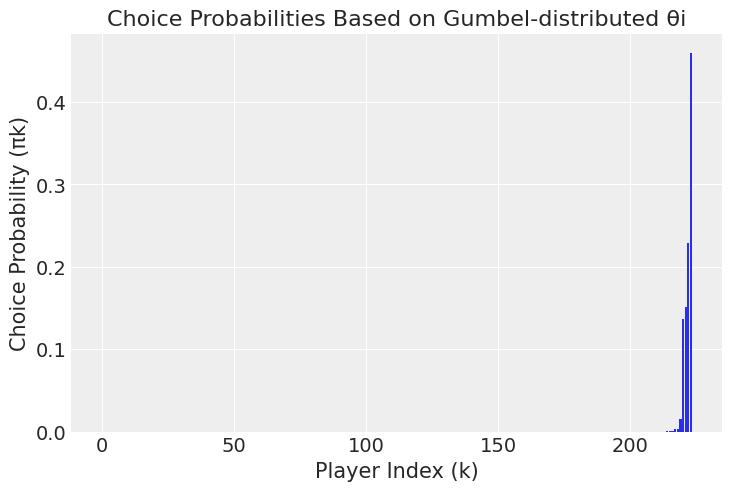

In [32]:
import numpy as np
import matplotlib.pyplot as plt

c = 224
counter=1
theta_values=[]
while counter<=c:
    theta = np.random.gumbel(counter, 1)
    theta_values.append(theta)
    counter+=1

# Create a function to calculate πk based on θk
def choice_probability(theta, theta_k):
    return np.exp(theta_k) / np.sum(np.exp(theta))

# Calculate choice probabilities for each player (πk) based on their θi values
choice_probabilities = [choice_probability(theta_values, theta_k) for theta_k in theta_values]

# Normalize choice probabilities to sum to 1
choice_probabilities /= np.sum(choice_probabilities)

# Display the generated θi values and choice probabilities
print("θi values:", theta_values)
print("Choice Probabilities (πk):", choice_probabilities)

# Plot the choice probabilities
plt.bar(range(c), choice_probabilities)
plt.xlabel("Player Index (k)")
plt.ylabel("Choice Probability (πk)")
plt.title("Choice Probabilities Based on Gumbel-distributed θi")
plt.show()

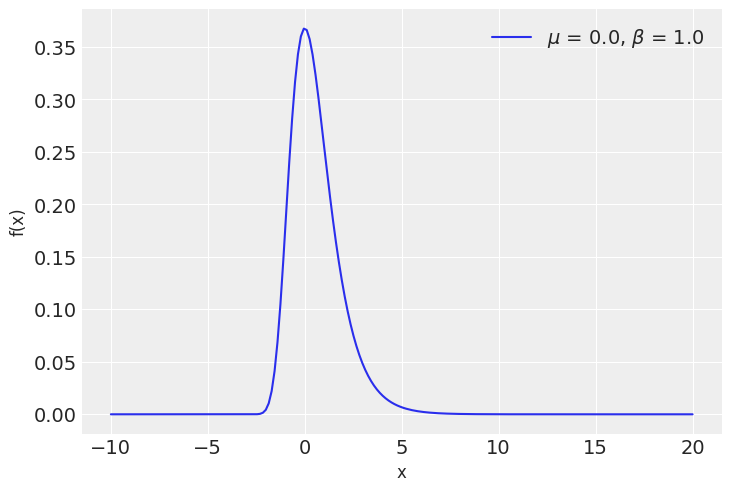

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import arviz as az
plt.style.use('arviz-darkgrid')
x = np.linspace(-10, 20, 200)
mus = [0.]
betas = [1.]
for mu, beta in zip(mus, betas):
    pdf = st.gumbel_r.pdf(x, loc=mu, scale=beta)
    plt.plot(x, pdf, label=r'$\mu$ = {}, $\beta$ = {}'.format(mu, beta))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)
plt.show()